In [1]:
# Importing Necessary Libraries  
import pandas as pd
import matplotlib.pyplot as plt
import re
import sklearn
import pickle
import warnings
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore',category=SyntaxWarning)
warnings.filterwarnings('ignore',category=FutureWarning)

In [3]:
# Loading the dataset
df = pd.read_csv("Resumes.csv")

In [4]:
# Removing Unnecessary Columns
data = df.drop(columns=['ID','Resume_html'])

In [5]:
# Unique Categories and their values counts (Sorted)
categories = sorted(data['Category'].unique())
categories_values = data['Category'].value_counts().sort_index()

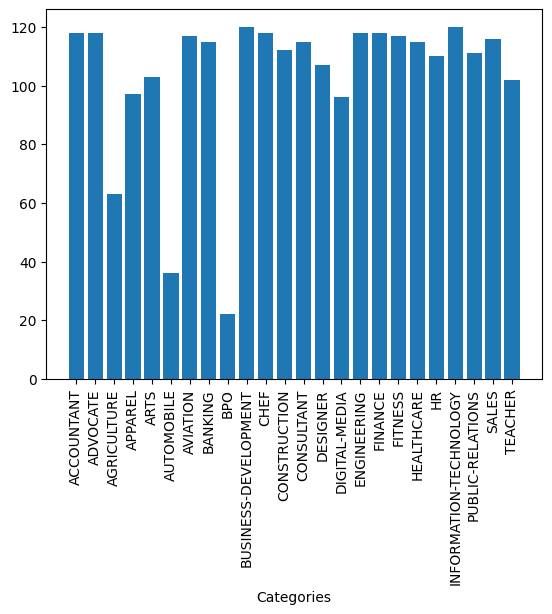

In [6]:
# Visualizing the data
plt.bar(categories,categories_values)
plt.xticks(rotation='vertical')
plt.xlabel('Categories')
plt.show()

In [7]:
# Creating function to clean the data
def clean(text):

    cleanText = re.sub('http\S+\s', ' ', text)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./\:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText) 
    cleanText = re.sub(' \n ', ' ',cleanText)
    cleanText = re.sub(' \\\/// ', ' ',cleanText)
    
    return cleanText

In [8]:
# Applying the above clean function to data
data['Resume_str'] = data['Resume_str'].apply(clean)

In [9]:
# Pre-Processing the data (Converting categorical to numeric)
encoder = LabelEncoder()
transform_categories = encoder.fit_transform(data['Category'])

In [10]:
# Pre-Processing the data (Converting resume_str tinto a matrix of TF-IDF)
tdif = TfidfVectorizer(stop_words='english')
tdif.fit(data['Resume_str'])
vectors = tdif.transform(data['Resume_str'])

In [11]:
# Splitting the data into training and testing
clf = OneVsRestClassifier(LinearSVC(C=0.1))
x = vectors
y = transform_categories
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=80)

In [12]:
# Training the model with training data
clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=LinearSVC(C=0.1))

In [13]:
# Testing the model
y_pred = clf.predict(x_test)

In [14]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        29
           1       0.77      0.65      0.71        26
           2       1.00      0.18      0.31        11
           3       0.75      0.33      0.46        27
           4       0.67      0.16      0.26        25
           5       1.00      0.25      0.40         8
           6       0.76      0.66      0.70        29
           7       0.72      0.65      0.68        20
           8       0.00      0.00      0.00         1
           9       0.61      0.76      0.68        25
          10       0.76      0.96      0.85        23
          11       0.94      0.89      0.92        19
          12       0.80      0.24      0.36        17
          13       0.68      0.87      0.76        15
          14       0.91      0.67      0.77        15
          15       0.64      0.85      0.73        27
          16       0.79      0.60      0.68        25
          17       0.75    

In [15]:
pickle.dump(tdif,open('tdif.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))